In [87]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

def simbolo_a_numero(simbolo):
    if simbolo == "-":
        return 0
    elif simbolo == "x" or simbolo == "p*" or simbolo == "c*" or simbolo == "a*" or simbolo == "t*" or simbolo == "d*" or simbolo == "r*":
        return -1
    elif simbolo == "p+":
        return 1
    elif simbolo == "c+":
        return 2
    elif simbolo == "a+":
        return 3
    elif simbolo == "t+":
        return 4
    elif simbolo == "d+":
        return 5
    elif simbolo == "r+":
        return 6


def etiqueta_a_vector(etiqueta):
    if etiqueta == "LUU":
        return [1, 0, 0, 0, 0, 0, 0, 0]
    elif etiqueta == "LLU":
        return [0, 1, 0, 0, 0, 0, 0, 0]
    elif etiqueta == "LLD":
        return [0, 0, 1, 0, 0, 0, 0, 0]
    elif etiqueta == "LDD":
        return [0, 0, 0, 1, 0, 0, 0, 0]
    elif etiqueta == "RDD":
        return [0, 0, 0, 0, 1, 0, 0, 0]
    elif etiqueta == "RRD":
        return [0, 0, 0, 0, 0, 1, 0, 0]
    elif etiqueta == "RRU":
        return [0, 0, 0, 0, 0, 0, 1, 0]
    elif etiqueta == "RUU":
        return [0, 0, 0, 0, 0, 0, 0, 1]

def remove(string):
    pattern = re.compile(r'\s+')
    return re.sub(pattern, '', string)

f = open("datasets/knight-moves.txt")

simbolos = []
etiquetas = []

for line in f:
    parts = line.split(" ")
    cells = parts[:8]
    cells_to_symbol = list(map(simbolo_a_numero, cells))
    label = remove(parts[8])
    labels_to_vector = etiqueta_a_vector(label)

    simbolos.append(cells_to_symbol)
    etiquetas.append(labels_to_vector)

f.close()

X = np.array([np.array(xi) for xi in simbolos])

Y = np.array(etiquetas)

# test_size = If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

print("score: ", clf.score(X_test, y_test))

score:  0.990909090909091


4483, 'X[1] <= 4.5\ngini = 0.179\nsamples = 301\nvalue = [[277, 24]\n[267, 34]\n[269, 32]\n[274, 27]\n[154, 147]\n[292, 9]\n[291, 10]\n[283, 18]]'),
 Text(240.89892911779705, 168.70344827586206, 'X[2] <= 4.5\ngini = 0.161\nsamples = 261\nvalue = [[238, 23]\n[261, 0]\n[231, 30]\n[237, 24]\n[114, 147]\n[252, 9]\n[251, 10]\n[243, 18]]'),
 Text(235.77705252422234, 161.2055172413793, 'X[3] <= 4.5\ngini = 0.138\nsamples = 227\nvalue = [[207, 20]\n[227, 0]\n[227, 0]\n[204, 23]\n[80, 147]\n[218, 9]\n[217, 10]\n[209, 18]]'),
 Text(232.36246812850587, 153.70758620689656, 'X[7] <= 3.5\ngini = 0.11\nsamples = 200\nvalue = [[184, 16]\n[200, 0]\n[200, 0]\n[200, 0]\n[53, 147]\n[191, 9]\n[190, 10]\n[182, 18]]'),
 Text(229.6308006119327, 146.2096551724138, 'X[0] <= 4.5\ngini = 0.08\nsamples = 180\nvalue = [[166, 14]\n[180, 0]\n[180, 0]\n[180, 0]\n[33, 147]\n[171, 9]\n[170, 10]\n[180, 0]]'),
 Text(228.2649668536461, 138.71172413793101, 'X[6] <= 3.5\ngini = 0.052\nsamples = 166\nvalue = [[166, 0]\n[166, 

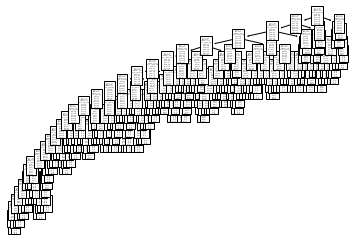

In [101]:
plot_tree(clf)

In [105]:
def interpretar_vector(vector):
    if np.array_equal(vector, [[1, 0, 0, 0, 0, 0, 0, 0]]):
        return "LUU"
    elif np.array_equal(vector, [[0, 1, 0, 0, 0, 0, 0, 0]]):
        return "LLU"
    elif np.array_equal(vector, [[0, 0, 1, 0, 0, 0, 0, 0]]):
        return "LLD"
    elif np.array_equal(vector, [[0, 0, 0, 1, 0, 0, 0, 0]]):
        return "LDD"
    elif np.array_equal(vector, [[0, 0, 0, 0, 1, 0, 0, 0]]):
        return "RDD"
    elif np.array_equal(vector, [[0, 0, 0, 0, 0, 1, 0, 0]]):
        return "RRD"
    elif np.array_equal(vector, [[0, 0, 0, 0, 0, 0, 1, 0]]):
        return "RRU"
    elif np.array_equal(vector, [[0, 0, 0, 0, 0, 0, 0, 1]]):
        return "RUU"
    else:
        return "Desconocido"

def get_simbolo(simbolo):
    if simbolo == -1:
        return "*"
    elif simbolo == 0:
        return "-"
    elif simbolo == 1:
        return "p+"
    elif simbolo == 2:
        return "c+"
    elif simbolo == 3:
        return "a+"
    elif simbolo == 4:
        return "t+"
    elif simbolo == 5:
        return "d+"
    elif simbolo == 6:
        return "r+"
    else:
        return "Desconocido"

def interpretar_simbolo(x):
    r = list(map(get_simbolo, x))
    return r

# clf.predict([X_test[0]])
yp = [clf.predict([xt]) for xt in X_test]

yps = []
x_is = []
y_is = []

for index, value in enumerate(X_test):
    yp = clf.predict([value])
    x = value
    y = y_test[index]

    yp_interpretado = interpretar_vector(yp)

    x_interpretado = interpretar_simbolo(x)
    y_interpretado = interpretar_vector(np.array([y]))

    yps.append(yp_interpretado)
    x_is.append(x_interpretado)
    y_is.append(y_interpretado)


print("yp", yp)
print("yp_interpretado", yp_interpretado)
print("\n")
print("x", x)
print("x_interpretado", x_interpretado)
print("\n")
print("y", y)
print("y_interpretado", [y_interpretado])



yp [[0 0 0 0 1 0 0 0]]
yp_interpretado RDD


x [ 1 -1 -1 -1  5  0 -1 -1]
x_interpretado ['p+', '*', '*', '*', 'd+', '-', '*', '*']


y [0 0 0 0 1 0 0 0]
y_interpretado ['RDD']


In [109]:
# VALIDACIÓN
# 6. Escribe un archivo llamado knight-moves-predict.txt con cada línea.

#f = open("datasets/resultado.txt", "w")
#f.write("Woops! I have deleted the content!")
#f.close()

### Notas

In [84]:
#import pandas as pd

#data = pd.read_csv("datasets/knight-moves.txt", sep=" ", header=None, names=["LUU", "LLU", "LLD", "LDD", "RDD", "RRD", "RRU", "RUU", "Y"])

#data
